In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential  #모델a 만들기
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM , BatchNormalization, Activation #레이어 쌓기
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy, mean_squared_error
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model, Model
from keras.utils.np_utils import to_categorical #일종의 원핫인코딩. 정답에 대한 내용들을 숫자로 바꾸겠다.

모델들을 섞어보자. 앙상블

In [2]:
(X_data, y_data), (tt_x, tt_y) = keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 6s 0us/step


In [3]:
X_data.shape, y_data.shape, tt_x.shape, tt_y.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
np.unique(tt_y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [7]:
s_x_data = (X_data.reshape(X_data.shape[0], -1))/255.0
s_tt_x = (tt_x.reshape(tt_x.shape[0],-1)) / 255.0

In [8]:
s_x_data.shape, s_tt_x.shape

((50000, 3072), (10000, 3072))

In [9]:
c_y_data = to_categorical(y_data)
c_tt_y = to_categorical(tt_y)

In [10]:
c_y_data.shape, c_tt_y.shape

((50000, 100), (10000, 100))

In [13]:
X,_,Y,_ = train_test_split(s_x_data, c_y_data, test_size=0.7, stratify=c_y_data)

In [11]:
m = Sequential()

In [12]:
m.add(Dense(50, input_shape = (3072,)))
m.add(Dense(50, activation='sigmoid'))
m.add(Dense(50, activation='sigmoid'))
m.add(Dense(50, activation='sigmoid'))
m.add(Dense(50, activation='sigmoid'))
m.add(Dense(100, activation='softmax'))
sgd = SGD(learning_rate = 0.001)
m.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics = 'accuracy')

In [14]:
his = m.fit(X,Y, validation_split=0.2, epochs=30)

Epoch 1/30
375/375 [==============================] - 3s 6ms/step - loss: 4.6903 - accuracy: 0.0098 - val_loss: 4.6819 - val_accuracy: 0.0107
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 4.6810 - accuracy: 0.0098 - val_loss: 4.6738 - val_accuracy: 0.0107
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 4.6729 - accuracy: 0.0098 - val_loss: 4.6667 - val_accuracy: 0.0107
Epoch 4/30
375/375 [==============================] - 2s 5ms/step - loss: 4.6658 - accuracy: 0.0098 - val_loss: 4.6605 - val_accuracy: 0.0107
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 4.6595 - accuracy: 0.0098 - val_loss: 4.6550 - val_accuracy: 0.0107
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 4.6539 - accuracy: 0.0098 - val_loss: 4.6502 - val_accuracy: 0.0107
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 4.6490 - accuracy: 0.0098 - val_loss: 4.6459 - val_accuracy: 0.0107
Epoch 

In [15]:
his.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

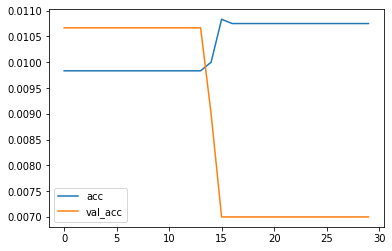

In [16]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()

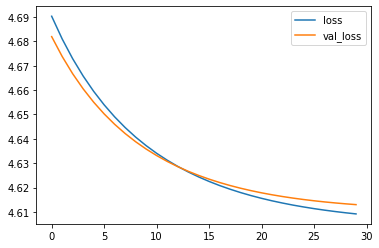

In [17]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [18]:
#뉴런이 겁나 많아서 기울기가 소실?? batch normalization 해보자
m1 = Sequential()
m1.add(Dense(50, activation='sigmoid', input_shape = (3072,)))
m1.add(BatchNormalization())
m1.add(Dense(50, activation='sigmoid'))
m1.add(BatchNormalization())
m1.add(Dense(50, activation='sigmoid'))
m1.add(BatchNormalization())
m1.add(Dense(50, activation='sigmoid'))
m1.add(BatchNormalization())
m1.add(Dense(50, activation='sigmoid'))
m1.add(BatchNormalization())
m1.add(Dense(100, activation='softmax'))
sgd = SGD(learning_rate = 0.001)
m1.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics = 'accuracy')

In [19]:
his1 = m1.fit(X,Y, validation_split=0.2, epochs=30)

Epoch 1/30
375/375 [==============================] - 4s 6ms/step - loss: 4.7657 - accuracy: 0.0147 - val_loss: 4.5499 - val_accuracy: 0.0200
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 4.5940 - accuracy: 0.0237 - val_loss: 4.5369 - val_accuracy: 0.0310
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 4.5050 - accuracy: 0.0336 - val_loss: 4.4729 - val_accuracy: 0.0410
Epoch 4/30
375/375 [==============================] - 2s 6ms/step - loss: 4.4398 - accuracy: 0.0421 - val_loss: 4.4179 - val_accuracy: 0.0433
Epoch 5/30
375/375 [==============================] - 2s 6ms/step - loss: 4.3880 - accuracy: 0.0500 - val_loss: 4.3775 - val_accuracy: 0.0540
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 4.3440 - accuracy: 0.0553 - val_loss: 4.3553 - val_accuracy: 0.0533
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 4.3080 - accuracy: 0.0581 - val_loss: 4.3204 - val_accuracy: 0.0550
Epoch 

In [20]:
#뉴런이 겁나 많아서 기울기가 소실?? batch normalization 해보자
m2 = Sequential()
m2.add(Dense(100, activation='sigmoid', input_shape = (3072,)))
m2.add(BatchNormalization())
m2.add(Dense(100, activation='sigmoid'))
m2.add(BatchNormalization())
m2.add(Dense(100, activation='sigmoid'))
m2.add(BatchNormalization())
m2.add(Dense(100, activation='sigmoid'))
m2.add(BatchNormalization())
m2.add(Dense(100, activation='sigmoid'))
m2.add(BatchNormalization())
m2.add(Dense(100, activation='softmax'))
sgd = SGD(learning_rate = 0.001)
m2.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics = 'accuracy')

In [21]:
his2 = m2.fit(X,Y, validation_split=0.2, epochs=100)

Epoch 1/100
375/375 [==============================] - 4s 7ms/step - loss: 4.7676 - accuracy: 0.0225 - val_loss: 4.5270 - val_accuracy: 0.0290
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 4.5004 - accuracy: 0.0361 - val_loss: 4.4489 - val_accuracy: 0.0390
Epoch 3/100
375/375 [==============================] - 3s 8ms/step - loss: 4.3594 - accuracy: 0.0519 - val_loss: 4.3538 - val_accuracy: 0.0523
Epoch 4/100
375/375 [==============================] - 3s 7ms/step - loss: 4.2699 - accuracy: 0.0624 - val_loss: 4.2905 - val_accuracy: 0.0637
Epoch 5/100
375/375 [==============================] - 2s 7ms/step - loss: 4.2008 - accuracy: 0.0728 - val_loss: 4.2311 - val_accuracy: 0.0717
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 4.1422 - accuracy: 0.0791 - val_loss: 4.1871 - val_accuracy: 0.0780
Epoch 7/100
375/375 [==============================] - 3s 7ms/step - loss: 4.0960 - accuracy: 0.0913 - val_loss: 4.1412 - val_accuracy: 0.0870

In [22]:
#뉴런이 겁나 많아서 기울기가 소실?? batch normalization 해보자
m3 = Sequential()
m3.add(Dense(100, activation='sigmoid', input_shape = (3072,)))
m3.add(BatchNormalization())
m3.add(Dense(100, activation='sigmoid'))
m3.add(BatchNormalization())
m3.add(Dense(100, activation='sigmoid'))
m3.add(BatchNormalization())
m3.add(Dense(100, activation='sigmoid'))
m3.add(BatchNormalization())
m3.add(Dense(100, activation='sigmoid'))
m3.add(BatchNormalization())
m3.add(Dense(100, activation='softmax'))
#sgd = SGD(learning_rate = 0.001)
m3.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
his3 = m3.fit(X,Y, validation_split=0.2, epochs=100)

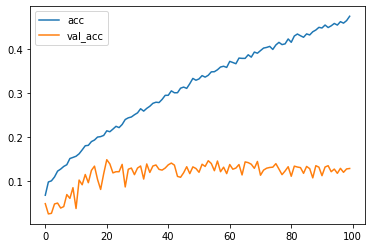

In [24]:
plt.plot(his3.history['accuracy'])
plt.plot(his3.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()

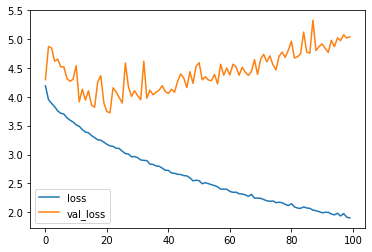

In [25]:
plt.plot(his3.history['loss'])
plt.plot(his3.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

CNN

In [2]:
(X_data, y_data), (tt_x, tt_y) = keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 5s 0us/step


In [27]:
X_data.shape, tt_x.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [28]:
y_data.shape, tt_y.shape

((50000, 1), (10000, 1))

In [29]:
np.unique(y_data, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 5

In [3]:
c_y_data = to_categorical(y_data)
c_tt_y = to_categorical(tt_y)

In [31]:
c_y_data.shape, c_tt_y.shape

((50000, 100), (10000, 100))

In [4]:
s_X_data = X_data.astype(float)/ 255.0

In [5]:
s_tt_x = tt_x.astype(float) / 255.0

In [6]:
X, val_x, y, val_y = train_test_split(s_X_data, c_y_data, test_size=0.2, stratify = c_y_data)

In [38]:
X.shape

(40000, 32, 32, 3)

In [40]:
del m

In [7]:
m = Sequential()
m.add(Conv2D(32, kernel_size = 3, padding='same', activation='relu', input_shape=(32,32,3)))
m.add(Conv2D(32, kernel_size = 3, padding='same', activation='relu'))
m.add(MaxPooling2D(2))
m.add(Flatten())
m.add(Dense(50, activation = 'relu'))
m.add(Dense(100, activation = 'softmax'))
m.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [42]:
m.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_26 (Dense)            (None, 50)                409650    
                                                                 
 dense_27 (Dense)            (None, 100)               5100      
                                                      

In [8]:
hy = m.fit(X, y, validation_data=[val_x, val_y],epochs=50)

Epoch 1/50
1250/1250 [==============================] - 17s 5ms/step - loss: 3.9401 - accuracy: 0.0995 - val_loss: 3.5017 - val_accuracy: 0.1667
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 3.2220 - accuracy: 0.2182 - val_loss: 3.1586 - val_accuracy: 0.2325
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 2.8697 - accuracy: 0.2830 - val_loss: 2.9170 - val_accuracy: 0.2773
Epoch 4/50
1250/1250 [==============================] - 6s 4ms/step - loss: 2.6648 - accuracy: 0.3226 - val_loss: 2.8491 - val_accuracy: 0.2910
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 2.5207 - accuracy: 0.3474 - val_loss: 2.8136 - val_accuracy: 0.2971
Epoch 6/50
1250/1250 [==============================] - 6s 4ms/step - loss: 2.4015 - accuracy: 0.3711 - val_loss: 2.7973 - val_accuracy: 0.3049
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3101 - accuracy: 0.3899 - val_loss: 2.8537 - val_accuracy

In [9]:
hy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

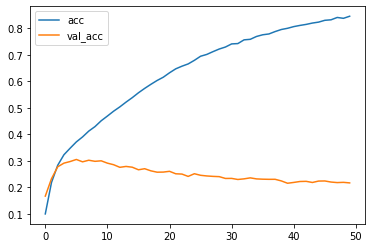

In [10]:
plt.plot(hy.history['accuracy'])
plt.plot(hy.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()

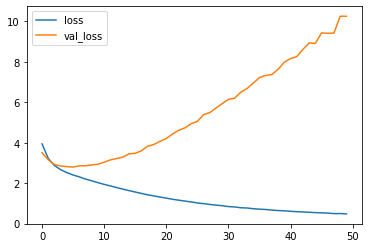

In [11]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

#과적합이다. 

In [13]:
del m1

In [14]:
#드롭아웃을 해보자.
m1 = Sequential()
m1.add(Conv2D(32, kernel_size = 3, padding='same', activation='relu', input_shape=(32,32,3)))
m1.add(Conv2D(32, kernel_size = 3, padding='same', activation='relu'))
m1.add(MaxPooling2D(2))
m1.add(Flatten())
m1.add(Dense(50, activation = 'relu'))
m1.add(Dropout(0.3))
m1.add(Dense(100, activation = 'softmax'))
m1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [15]:
hy1 = m1.fit(X, y, validation_data=[val_x, val_y],epochs=50)

Epoch 1/50
1250/1250 [==============================] - 7s 5ms/step - loss: 4.2442 - accuracy: 0.0517 - val_loss: 3.8094 - val_accuracy: 0.1169
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 3.8086 - accuracy: 0.1036 - val_loss: 3.4628 - val_accuracy: 0.1754
Epoch 3/50
1250/1250 [==============================] - 6s 5ms/step - loss: 3.6182 - accuracy: 0.1338 - val_loss: 3.3300 - val_accuracy: 0.2053
Epoch 4/50
1250/1250 [==============================] - 6s 5ms/step - loss: 3.4891 - accuracy: 0.1500 - val_loss: 3.2136 - val_accuracy: 0.2221
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: 3.3906 - accuracy: 0.1634 - val_loss: 3.1411 - val_accuracy: 0.2369
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 3.2966 - accuracy: 0.1789 - val_loss: 3.1124 - val_accuracy: 0.2374
Epoch 7/50
1250/1250 [==============================] - 6s 4ms/step - loss: 3.2189 - accuracy: 0.1895 - val_loss: 3.0448 - val_accuracy:

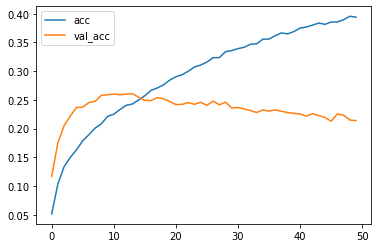

In [16]:
plt.plot(hy1.history['accuracy'])
plt.plot(hy1.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()

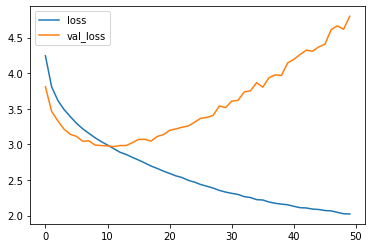

In [17]:
plt.plot(hy1.history['loss'])
plt.plot(hy1.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

#드롭아웃을 해도 여전히 과적합이다. 또한 train data에 대한 성능마저 좋지 않다. 학습 자체가 안 된 것.
#컨볼루션 층을 좀 늘려서 피쳐의 의미를 더 뽑아보고 Dense레이어의 층과 뉴런도 좀 늘려보자 

In [48]:
del m2

In [49]:
#배치정규화는 담에 해보도록 하자
m2 = Sequential()
m2.add(Conv2D(32, kernel_size = (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
m2.add(BatchNormalization())
m2.add(Dropout(0.3))
m2.add(Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'))
m2.add(BatchNormalization())
m2.add(MaxPooling2D(2))
m2.add(Dropout(0.3))

m2.add(Conv2D(128, kernel_size = (3,3), padding='same', activation='relu'))
m2.add(BatchNormalization())
m2.add(Dropout(0.3))
m2.add(Conv2D(128, kernel_size = (3,3), padding='same', activation='relu'))
m2.add(BatchNormalization())
m2.add(MaxPooling2D(2))

m2.add(Flatten())
m2.add(Dense(128, activation = 'relu'))
m2.add(BatchNormalization())
m2.add(Dropout(0.3))
m2.add(Dense(256, activation = 'relu'))
m2.add(BatchNormalization())
m2.add(Dropout(0.3))
m2.add(Dense(100, activation = 'softmax'))
m2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [43]:
del hy2

NameError: ignored

In [50]:
hy2 = m2.fit(X, y, validation_data=[val_x, val_y],epochs=70)

Epoch 1/70
1250/1250 [==============================] - 12s 9ms/step - loss: 4.0549 - accuracy: 0.0975 - val_loss: 3.4042 - val_accuracy: 0.1858
Epoch 2/70
1250/1250 [==============================] - 11s 9ms/step - loss: 3.2950 - accuracy: 0.1990 - val_loss: 2.8193 - val_accuracy: 0.2912
Epoch 3/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.8456 - accuracy: 0.2796 - val_loss: 2.6155 - val_accuracy: 0.3325
Epoch 4/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.5633 - accuracy: 0.3358 - val_loss: 2.3303 - val_accuracy: 0.3875
Epoch 5/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.3611 - accuracy: 0.3783 - val_loss: 2.2164 - val_accuracy: 0.4096
Epoch 6/70
1250/1250 [==============================] - 12s 9ms/step - loss: 2.1921 - accuracy: 0.4159 - val_loss: 2.1795 - val_accuracy: 0.4326
Epoch 7/70
1250/1250 [==============================] - 11s 9ms/step - loss: 2.0536 - accuracy: 0.4459 - val_loss: 2.0589 - val_ac

KeyboardInterrupt: ignored

레이어층 10개까지만 써보기, Dense 빼고 해보기